In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
festivales_bcn_22 = pd.read_pickle("./data/festivales_bcn_22_procesado.pkl")

In [3]:
categoricas_festivales = [
    "Ambit",
    "Titularidad",
    "NomDelFestival",
    "Mes",
    "Estacion",
    "Entrada"
]

In [4]:
categoricas_destacadas = [
    'Ambit', 
    'Titularidad', 
    'Mes', 
    'Estacion',
    "Entrada"

]

In [5]:
columnas_numericas_fests = [
    "Edicio",
    "Asistentes"
]

Funciones análisis

In [6]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    # Filtra solo las columnas que están en categoricas_destacadas
    columnas_categoricas = [col for col in columnas_categoricas if col in categoricas_destacadas]
    
    num_columnas = 2 
    num_filas = (len(columnas_categoricas) + num_columnas - 1) // num_columnas  # Calcula el número de filas necesario

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))  # Ajusta el tamaño del subplot
    axes = axes.flatten()  # Aplanar el array de axes para un manejo más fácil

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if isinstance(df[col].iloc[0], list):  # Verificar si el elemento es una lista
            temp_df = df.explode(col)
        else:
            temp_df = df

        serie = temp_df[col].value_counts()
        if relativa:
            total = serie.sum()
            serie = serie.apply(lambda x: x / total)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            ax.set_ylabel('Frecuencia')

        # Usar la paleta 'viridis' y asignar 'x' a 'hue'
        sns.barplot(x=serie.index, y=serie, hue=serie.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  # Ocultar ejes no utilizados

    plt.tight_layout()
    plt.show()

In [7]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [8]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [9]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [10]:
def variabilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/ df_var["mean"]
    return df_var

In [11]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [12]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

Tendencia central

In [13]:
festivales_bcn_22.describe().loc["mean"]

Any            2022.000000
Edicio           17.653846
Asistentes    47689.830189
Name: mean, dtype: float64

In [14]:
festivales_bcn_22.describe().loc["50%"]

Any            2022.0
Edicio           13.5
Asistentes    15000.0
Name: 50%, dtype: float64

In [15]:
festivales_bcn_22.describe().loc["max"]

Any             2022.0
Edicio            54.0
Asistentes    460500.0
Name: max, dtype: float64

In [16]:
festivales_bcn_22.describe().loc["min"]

Any           2022.0
Edicio           3.0
Asistentes    2000.0
Name: min, dtype: float64

In [17]:
festivales_bcn_22[categoricas_destacadas].mode().T

,0
Ambit,Música
Titularidad,Privada
Mes,Noviembre
Estacion,Otoño
Entrada,De Pago


Comentarios <br>
La mediana, situada en 13, parece ser más representativa a la hora de ver la cantidad de ediciones que llevan a cuestas los festivales más representativos, ya que hay valores bastante alejados de la media, como uno de ellos que lleva 54 ediciones a cuestas, lo que resulta en una media algo distorcionada. <br>
Lo mismo sucede con la cantidad de asistentes, ya que hay casos que van desde los 2 mil hasta el casi medio millón, pero el valor más representativo está en torno a los 15 mil.
Además, según las modas, el festival típico de Barcelona parecería ser uno de música organizado por una entidad privada, que  cobra entrada, y que tiene lugar en pleno otoño.

Frecuencias relativa y absoluta

In [18]:
for catego in categoricas_destacadas:
    print(festivales_bcn_22[catego].value_counts())
    print("\n")

Ambit
Música                         20
Audiovisuals                   13
Multidisciplinaris i altres     7
Arts visuals                    5
Arts escèniques                 5
Lletres                         3
Name: count, dtype: int64


Titularidad
Privada    43
Pública    10
Name: count, dtype: int64


Mes
Noviembre     8
Septiembre    7
Octubre       7
Julio         7
Enero         6
Junio         6
Marzo         4
Mayo          3
Abril         2
Febrero       2
Diciembre     1
Name: count, dtype: int64


Estacion
Otoño        18
Verano       13
Invierno     12
Primavera    10
Name: count, dtype: int64


Entrada
De Pago    40
Gratis     11
Mixta       2
Name: count, dtype: int64




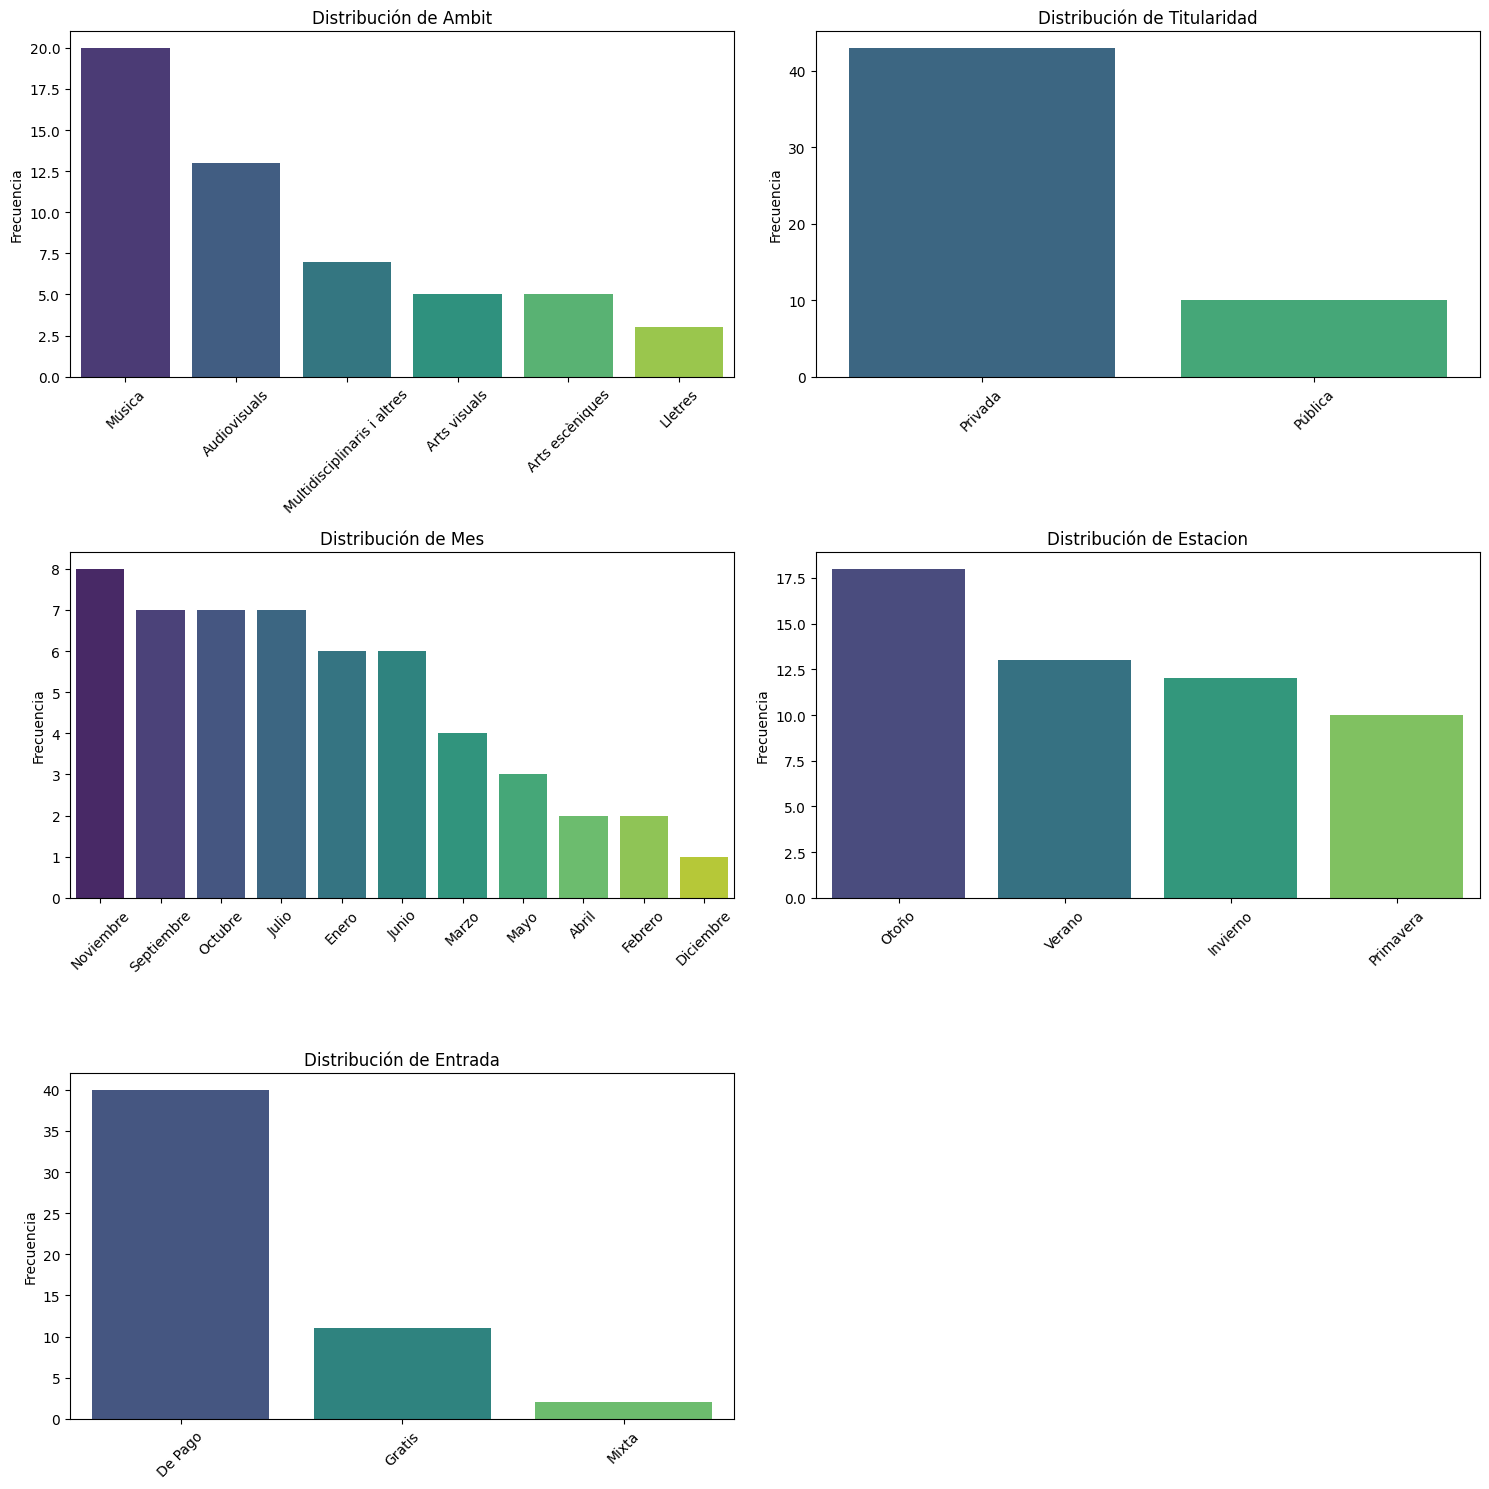

In [19]:
pinta_distribucion_categoricas(festivales_bcn_22, categoricas_destacadas)

Comentarios <br>
El número de propuestas del sector privado casi triplica las del sector público, muy similar a la proporción de festivales gratuitos vs. de pago, con una brecha mayor que en el 2021, e incluso mayor que en 2019, pre pandemia.<br>
En agosto ya no hay festivales, sí antes y después, que son los 2 momentos con picos más altos, pero con una fuerte caída en general en invierno, a excepción de enero. Pero la distribución es más equilibrada en las estaciones que el año anterior.Curiosamente la primavera, antes período de mayor cantidad de festivales, es aquí el último. <br>
La música es sin duda la protagonista de los festivales, con los audiovisuales en un segundo lugar alejado, diferencia más acentuada que en 2021.

In [20]:
for catego in categoricas_destacadas:
    print(festivales_bcn_22[catego].value_counts()/len(festivales_bcn_22)*100)
    print("\n")

Ambit
Música                         37.735849
Audiovisuals                   24.528302
Multidisciplinaris i altres    13.207547
Arts visuals                    9.433962
Arts escèniques                 9.433962
Lletres                         5.660377
Name: count, dtype: float64


Titularidad
Privada    81.132075
Pública    18.867925
Name: count, dtype: float64


Mes
Noviembre     15.094340
Septiembre    13.207547
Octubre       13.207547
Julio         13.207547
Enero         11.320755
Junio         11.320755
Marzo          7.547170
Mayo           5.660377
Abril          3.773585
Febrero        3.773585
Diciembre      1.886792
Name: count, dtype: float64


Estacion
Otoño        33.962264
Verano       24.528302
Invierno     22.641509
Primavera    18.867925
Name: count, dtype: float64


Entrada
De Pago    75.471698
Gratis     20.754717
Mixta       3.773585
Name: count, dtype: float64




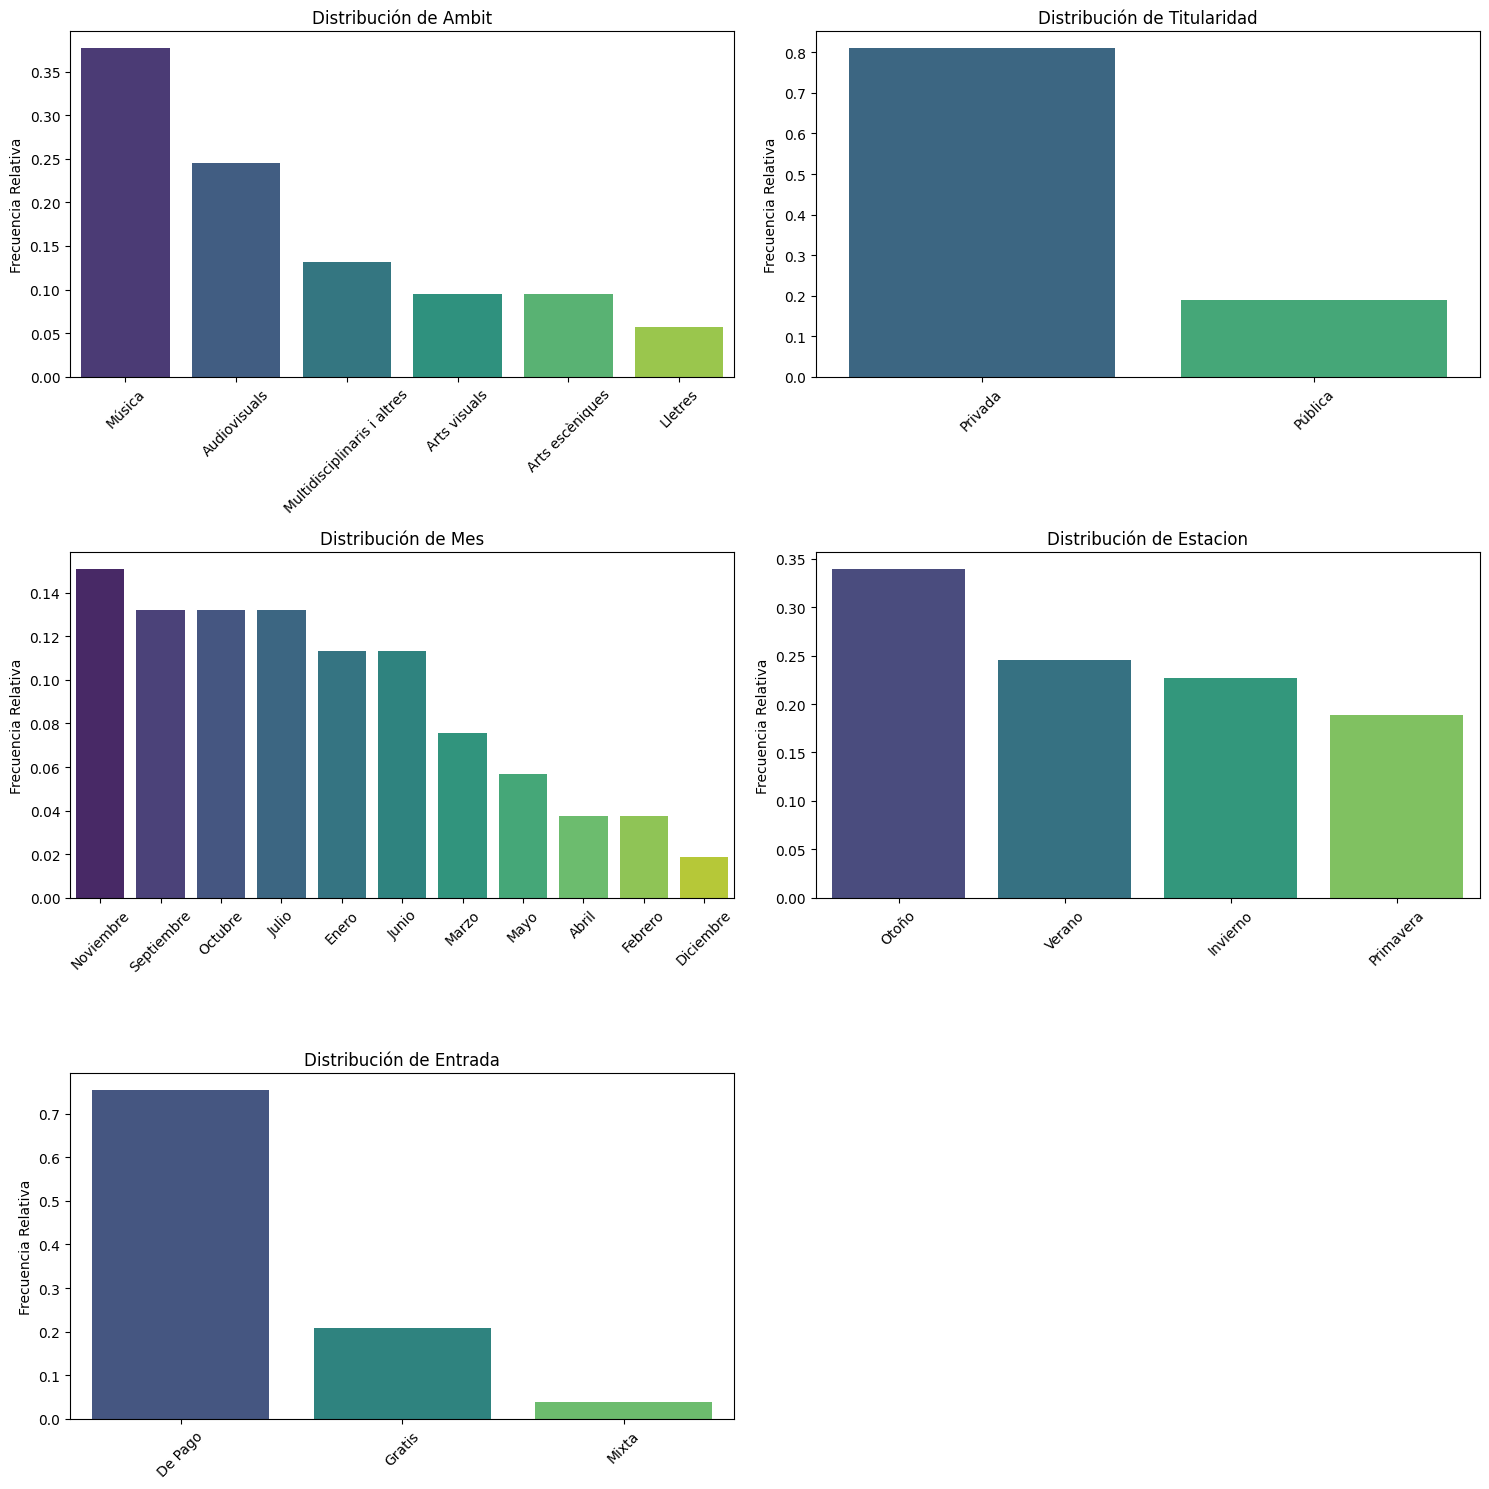

In [21]:
pinta_distribucion_categoricas(festivales_bcn_22, categoricas_destacadas, relativa = True)

Comentarios:<br>
Si en lugar de atender a las frecuencias absolutas miramos las relativas, las conclusiones son las mismas. La diferencia entre las gráficas no es tan grande. No hace falta graficar ambas cada vez.<br>
Cabe destacar la gran similitud que estos gráficos presentan frente a los de 2019, prepandemia.

Medidas de posición

In [22]:
festivales_bcn_22.describe()

,Any,Edicio,Asistentes
count,53.0,52.000000,53.000000
mean,2022.0,17.653846,47689.830189
std,0.0,10.961402,88763.000594
min,2022.0,3.000000,2000.000000
25%,2022.0,10.000000,7600.000000
50%,2022.0,13.500000,15000.000000
75%,2022.0,25.250000,33600.000000
max,2022.0,54.000000,460500.000000


In [23]:
get_IQR(festivales_bcn_22,"Edicio") 
# No es tanto mayor que la mediana (11), y casi igual que la media (mean)

15.25

In [24]:
print(festivales_bcn_22["Edicio"].quantile(0.5), "\n",
    festivales_bcn_22["Edicio"].quantile(0.9), "\n",
    festivales_bcn_22["Edicio"].quantile(0.95), "\n",
    festivales_bcn_22["Edicio"].max())

13.5 
 30.0 
 33.89999999999999 
 54.0


Comentarios: <br>
Es notable la dispersión de valores cuando miramos el rango intercuartílico en lo referente al número de ediciones, ya que la mediana está en las 13 ediciones, el 90% está por debajo de las 48, y el último 10% concentra picos de más de 50.<br>
No parece una observación demasiado significativa en este análisis...

In [25]:
get_IQR(festivales_bcn_22,"Asistentes") 
# Sí es mucho mayor que la mediana(2120). Hay mucha dispersión. Hay que tomar con cuidado la tendencia central

26000.0

In [26]:
print(festivales_bcn_22["Asistentes"].quantile(0.5), "\n",
    festivales_bcn_22["Asistentes"].quantile(0.9), "\n",
    festivales_bcn_22["Asistentes"].quantile(0.95), "\n",
    festivales_bcn_22["Asistentes"].max())

15000.0 
 107992.80000000005 
 227422.19999999984 
 460500.0


Comentarios: <br>
Mucho más agudo aún es el pico de número de asistentes, en el que la mediana está en 14.000, el primer 90% en 106 mil, que ya es 7.5 veces más, pero el último segmento pega un salto abrupto superando los 220 mil, el doble. Y el máximo está arriba de los 450, el doble del .95. El máximo es unas 32 veces la mediana.

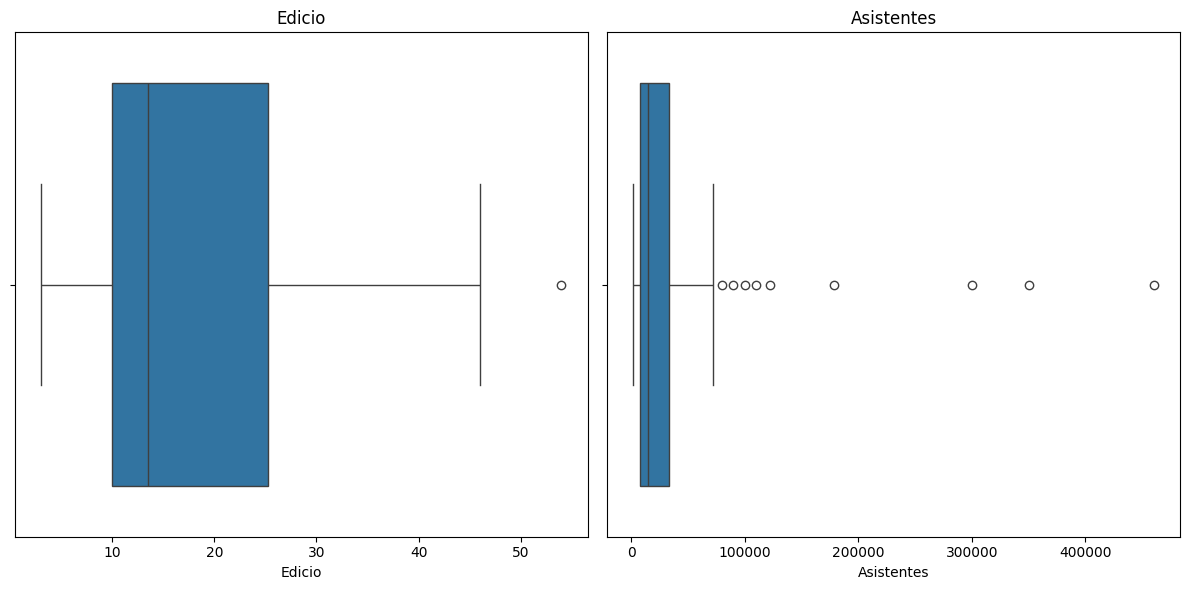

In [27]:
plot_multiple_boxplots(festivales_bcn_22, columnas_numericas_fests)

Comentarios: <br>
Gracias a los boxplots podemos observar como no hay una media centrada, y además hay bastantes outliers en las cifras de asistentes, y unos cuantos bastante más alejados del grueso de los demás outliers.

In [28]:
plot_boxplot_grouped(festivales_bcn_22, "Edicio", "Asistentes")

# Por qué no consigo que se imprima esto????

Medidas de dispersión

In [29]:
festivales_bcn_22.describe().loc[["std", "mean"]].T

,std,mean
Any,0.000000,2022.000000
Edicio,10.961402,17.653846
Asistentes,88763.000594,47689.830189


In [30]:
variabilidad(festivales_bcn_22)
# Menos 15% es baja variabilidad, entre 15 y 30 es normal, más de 30 es alta = Es decir, todos tienen una altísima variabilidad! A ver visualmente...

,std,mean,CV
Any,0.000000,2022.000000,0.000000
Edicio,10.961402,17.653846,0.620907
Asistentes,88763.000594,47689.830189,1.861256


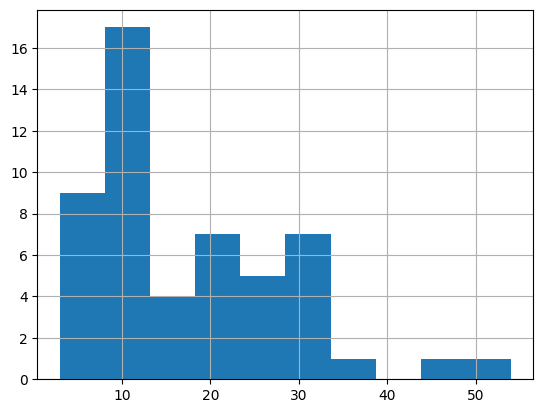

In [31]:
festivales_bcn_22["Edicio"].hist();

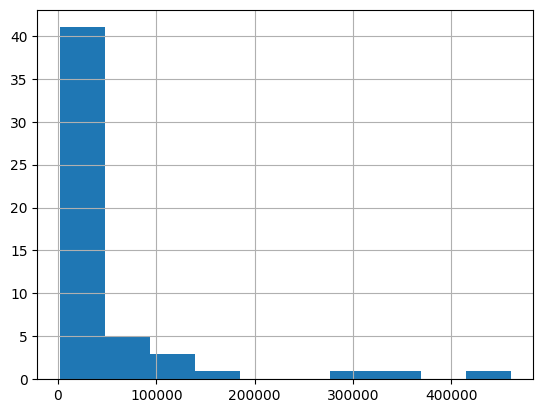

In [32]:
festivales_bcn_22["Asistentes"].hist();

Distribución

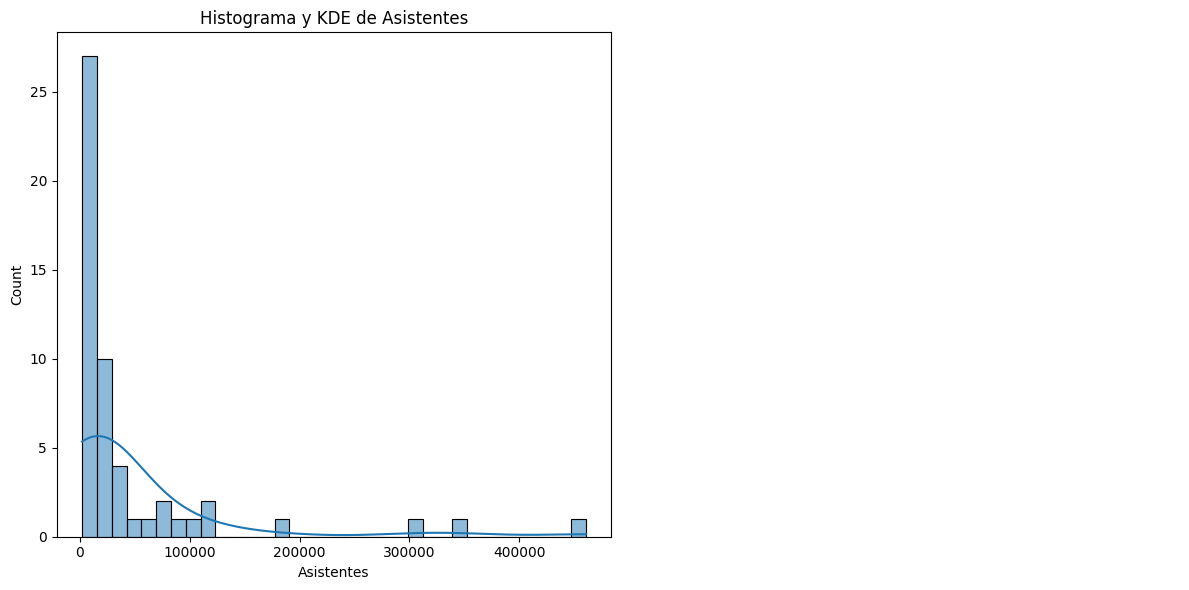

In [33]:
plot_histo_den(festivales_bcn_22, ["Asistentes"])

A randes rasgos, este gráfico es muy similar para cada año de la década anallizada.

Anomalías outliers

(2,)


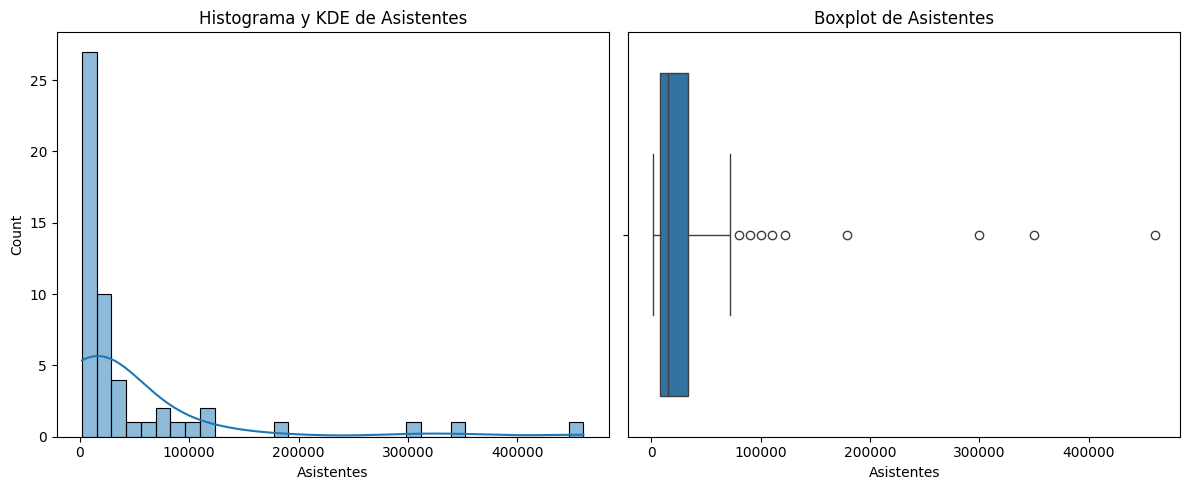

In [34]:
plot_combined_graphs(festivales_bcn_22, ["Asistentes"])

In [35]:
festivales_bcn_22 = festivales_bcn_22.sort_values('Asistentes', ascending=False)
primeros_10 = festivales_bcn_22.head(10)  
tipo_entradas_top_festivales = primeros_10['Entrada'].value_counts()

porcentaje_tipo_entradas_primeros_10 = tipo_entradas_top_festivales / tipo_entradas_top_festivales.sum() * 100

for entrada, count in tipo_entradas_top_festivales.items():
    porcentaje = porcentaje_tipo_entradas_primeros_10[entrada]
    print(f"{entrada}: {count} - {porcentaje:.2f}%")

De Pago: 6 - 60.00%
Gratis: 3 - 30.00%
Mixta: 1 - 10.00%


In [36]:
festivales_bcn_22 = festivales_bcn_22.sort_values('Asistentes', ascending=False)
primeros_10 = festivales_bcn_22.head(10)  
tipo_entradas_top_festivales = primeros_10['Ambit'].value_counts()

porcentaje_tipo_entradas_primeros_10 = tipo_entradas_top_festivales / tipo_entradas_top_festivales.sum() * 100

for entrada, count in tipo_entradas_top_festivales.items():
    porcentaje = porcentaje_tipo_entradas_primeros_10[entrada]
    print(f"{entrada}: {count} - {porcentaje:.2f}%")

Música: 6 - 60.00%
Multidisciplinaris i altres: 2 - 20.00%
Arts escèniques: 2 - 20.00%


In [37]:
festivales_bcn_22


,Any,Ambit,Edicio,NomDelFestival,Titularidad,Mes,Estacion,Asistentes,Entrada
46,2022,Música,20.0,Primavera Sound,Privada,Julio,Verano,460500.0,De Pago
12,2022,Música,9.0,Brunch-in the City,Privada,Marzo,Invierno,350000.0,De Pago
8,2022,Multidisciplinaris i altres,3.0,Barcelona Festival de Nadal,Pública,Diciembre,Otoño,300000.0,Gratis
39,2022,Arts escèniques,13.0,Mercè Arts de Carrer. MAC,Pública,Septiembre,Otoño,179037.0,Gratis
51,2022,Música,29.0,Sónar. Festival Internacional de Música Avança...,Privada,Junio,Primavera,122000.0,De Pago
29,2022,Arts escèniques,46.0,Grec Festival de Barcelona,Pública,Junio,Verano,109991.0,Mixta
35,2022,Multidisciplinaris i altres,11.0,Llum BCN,Pública,Febrero,Invierno,100000.0,Gratis
26,2022,Música,10.0,Festival Jardins de Pedralbes,Privada,Junio,Primavera,90000.0,De Pago
53,2022,Música,54.0,Voll-Damm Festival de Jazz de Barcelona,Privada,Octubre,Otoño,80000.0,De Pago
21,2022,Música,NaN,Festival Cruïlla,Privada,Julio,Verano,72000.0,De Pago
